## *Elements of Machine Learning* 2023
### <font size=3 color='gray'>Alan Reyes-Figueroa</font>

## El PCA como método de compresión de imágenes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
#from PIL import Image

## 1. PCA con imágenes

In [2]:
I = plt.imread('quetzal.png')
I.shape

(540, 500, 4)

In [3]:
Igray = rgb2gray(I)
Igray.shape

<ipython-input-3-e3ccc6222425>:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  Igray = rgb2gray(I)


(540, 500)

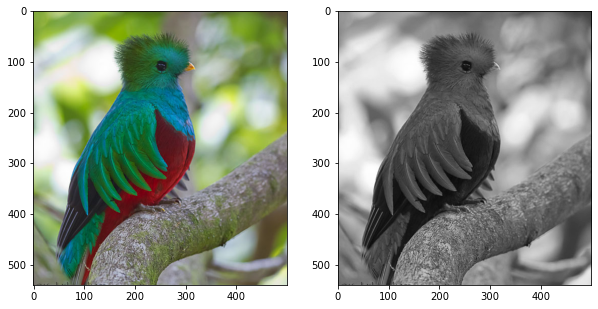

In [4]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(I)
plt.subplot(1,2,2)
plt.imshow(Igray, cmap=plt.cm.gray)
plt.show()

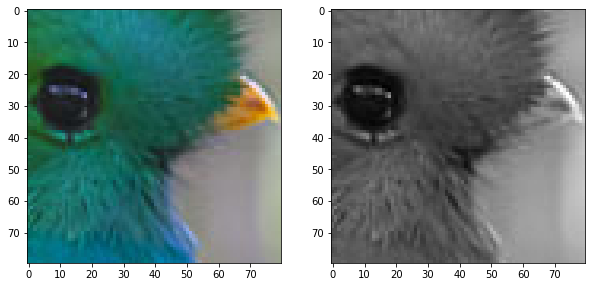

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(I[80:160, 240:320, :])
plt.subplot(1,2,2)
plt.imshow(Igray[80:160, 240:320], cmap=plt.cm.gray)
plt.show()

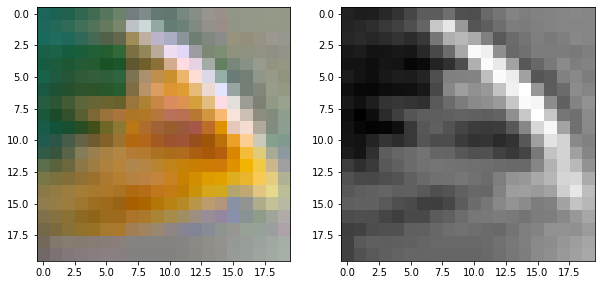

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(I[100:120, 300:320, :])
plt.subplot(1,2,2)
plt.imshow(Igray[100:120, 300:320], cmap=plt.cm.gray)
plt.show()

In [7]:
print((255*Igray[80:98, 300:318]).astype(np.uint8))

[[ 68  73  84  98 110 118 123 139 139 138 135 134 136 142 147 145 145 145]
 [ 75  83  89  98 107 111 111 116 122 130 135 136 138 139 141 146 146 146]
 [ 89  94  92  92  99 107 108 108 117 129 138 141 143 144 144 148 147 147]
 [ 93  92  85  82  91 105 114 127 131 135 137 137 136 138 140 149 149 148]
 [ 79  79  77  81  94 111 122 117 121 126 130 134 138 144 149 150 150 149]
 [ 80  79  81  87  96 108 116 130 135 141 145 145 144 146 147 151 150 150]
 [ 86  85  82  81  94 118 136 147 140 133 132 136 141 143 142 150 151 153]
 [ 75  78  86  97 106 110 111 102 108 117 126 135 141 144 146 151 153 154]
 [ 83  81  81  80  81  82  83 101 114 130 141 144 146 150 154 153 154 156]
 [ 87  84  76  71  75  88 101 126 135 144 148 145 144 148 153 155 156 158]
 [ 84  83  86  92 105 118 125 132 135 138 141 141 143 149 152 156 158 159]
 [ 84  85  88  96 104 111 114 117 121 127 134 143 150 154 156 157 158 159]
 [ 86  86  83  81  85  93 100 105 110 120 132 142 149 152 153 157 158 159]
 [ 95  93  88  83  83  89

In [8]:
def image2vectorblocks(I, block_size):
    '''
    Función que convierte una imagen en escala de grises a un stack de bloques vectorizados.
    Inputs:   I = imagen grayscale de tamaño o shape (h, w).
              block_size = entero, que representa el tamaño de los bloques cuadrados,
                           se trabajarán bloques de tamaño o shape (block_size, block_size).
    Outputs:  stack = stack de bloques, el formato del stack es un numpy array de tamaño (N, b),
                      donde N es el número de bloques resultantes y b = block_size * block_size.
    '''
    (h, w) = I.shape[:2]
    stack = []
    
    for i in range(0, h//block_size):
        for j in range(0, w//block_size):
            block = I[block_size*i:block_size*(i+1), block_size*j:block_size*(j+1)].ravel()
            stack.append(block)
    stack = np.array(stack)
    return stack

In [9]:
def vectorblocks2image(stack, Ishape, block_size):
    '''
    Función que convierte una stack de bloques vectorizados a una imagen en escala de grises.
    Inputs:   stack  = stack de bloques, el formato del stack es un numpy array de tamaño (N, b),
                       donde N es el número de bloques resultantes y b = block_size * block_size.
              Ishape = tamaño de la imagen esperada de salida (h, w).
              block_size = entero, que representa el tamaño de los bloques cuadrados,
                           en el stack (block_size, block_size).
    Outputs:  J = imagen reconstruida en escala de grises, como numpy array de tamaño (h, w).
    '''

    (h, w) = Ishape
    J = np.zeros((h, w))
    
    for i in range(0, stack.shape[0]):
        r = i * block_size // w
        c = i - r*(w // block_size)
        block = stack[i,:].reshape(block_size, block_size)
        J[block_size*r:block_size*r+block_size, block_size*c:block_size*c+block_size] = block
    return J

In [10]:
sh = 20
stack = image2vectorblocks(Igray, sh)
stack.shape

(675, 400)

In [11]:
# Centramos los datos
mu = stack.mean(axis=0)
std = stack.std(axis=0)

Xc = (stack - mu) / std

In [12]:
U, S, V = np.linalg.svd(Xc)
print(U.shape, S.shape, V.shape)

(675, 675) (400,) (400, 400)


In [13]:
S = np.diag(S)
S.shape

(400, 400)

In [14]:
# probando con los siguientes números de componentes principales
ks = [1,2,3,4,5,10,15,20,30,40,50,60,70,80,90,100]

Ishape = Igray.shape[:2]
approx = []

for k in ks:
    appk = U[:,:k] @ S[:k,:k] @ V[:k,:] 
    J = vectorblocks2image(appk, Ishape, sh)
    approx.append(J)

In [15]:
J = vectorblocks2image(stack, Ishape, sh)
J.shape

(540, 500)

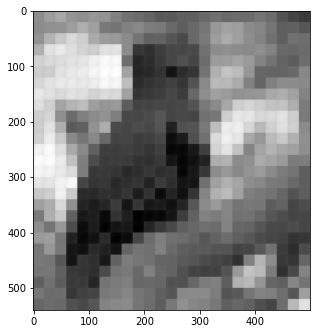

In [16]:
plt.figure(figsize=(5,5.5))
plt.imshow(approx[0], cmap='gray')
plt.show()

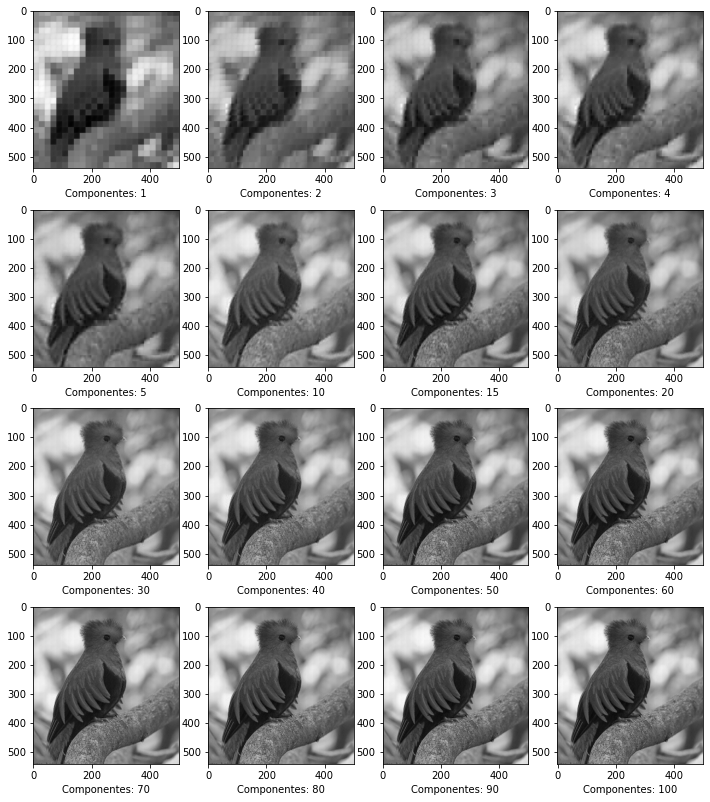

In [17]:
plt.figure(figsize=(12,14))
for i in range(0, 4):
    for j in range(0, 4):
        plt.subplot(4,4,4*i+j+1)
        plt.imshow(approx[4*i+j], cmap='gray')
        plt.xlabel('Componentes: {}'.format(ks[4*i+j]))
plt.show()

### Cálculo del Error

In [18]:
Cov = (Xc.T) @ Xc

In [19]:
eigs, _ = np.linalg.eig(Cov)

In [21]:
explained_variance = eigs / eigs.sum()

In [22]:
np.round(explained_variance[:20], 4)

array([8.842e-01, 4.170e-02, 2.070e-02, 7.500e-03, 5.300e-03, 3.000e-03,
       2.300e-03, 2.100e-03, 1.900e-03, 1.500e-03, 1.400e-03, 1.200e-03,
       1.000e-03, 9.000e-04, 9.000e-04, 8.000e-04, 7.000e-04, 7.000e-04,
       7.000e-04, 7.000e-04], dtype=float32)

In [23]:
explained_accumulative = explained_variance.cumsum()

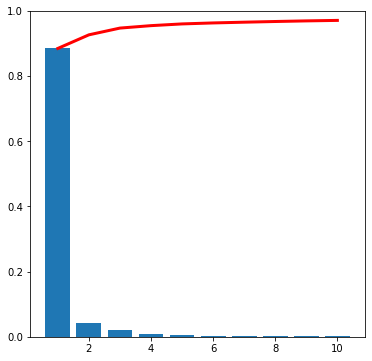

In [24]:
k = 10
plt.figure(figsize=(6,6))
plt.bar(np.arange(1,1+k), explained_variance[:k])
plt.plot(np.arange(1,1+k), explained_accumulative[:k], 'r-', lw=3)
plt.ylim([0,1])
plt.show()